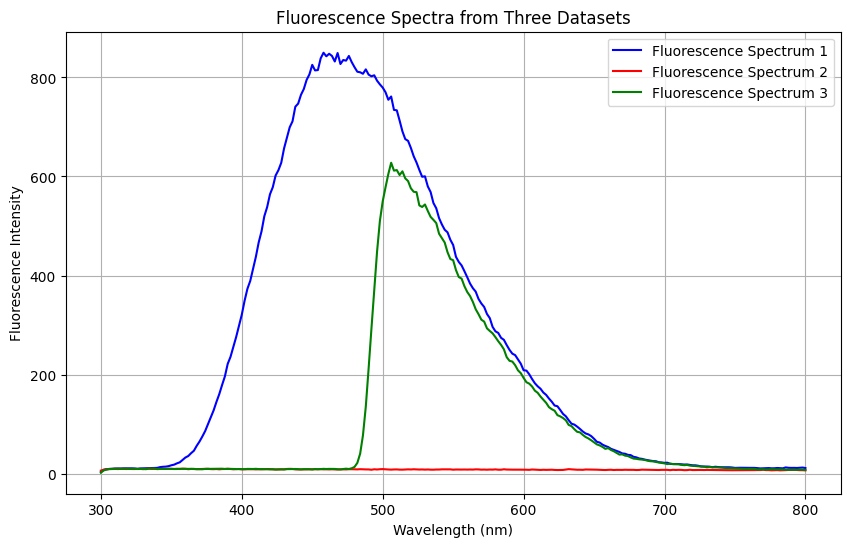

In [14]:
import matplotlib.pyplot as plt

def read_data(file_path):
    wavelengths = []
    fluorescence = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Find the "Data Points" section and start reading the data
        start_reading = False
        for line in lines:
            line = line.strip()

            # Skip header lines until you reach the data section
            if line.startswith("Data Points"):
                start_reading = True
                continue

            if start_reading:
                # Split the line into parts (assuming they are separated by spaces or tabs)
                parts = line.split()

                # Check if the line has two parts (wavelength and fluorescence value)
                if len(parts) == 2:
                    try:
                        # Convert to float, assuming the data format is correct
                        wavelength = float(parts[0])  # First part: wavelength (nm)
                        intensity = float(parts[1])   # Second part: intensity

                        wavelengths.append(wavelength)
                        fluorescence.append(intensity)
                    except ValueError:
                        # Skip lines where the data cannot be converted to float
                        continue

    return wavelengths, fluorescence


def plot_data(wavelengths1, fluorescence1, wavelengths2, fluorescence2, wavelengths3, fluorescence3):
    plt.figure(figsize=(10, 6))

    # Plot the first dataset
    plt.plot(wavelengths1, fluorescence1, label='Fluorescence Spectrum 1', color='b')
    
    # Plot the second dataset
    plt.plot(wavelengths2, fluorescence2, label='Fluorescence Spectrum 2', color='r')
    
    # Plot the third dataset
    plt.plot(wavelengths3, fluorescence3, label='Fluorescence Spectrum 3', color='g')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Fluorescence Intensity')
    plt.title('Fluorescence Spectra from Three Datasets')
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage
file_path_1 = 'b-bgo-14_xel_020425_1.TXT'  # Replace with the first file path
file_path_2 = 'b-bgo-14_xel_020425_1_bg.TXT'  # Replace with the second file path
file_path_3 = 'b-bgo-14_xel_020425_1_hp.TXT'  # Replace with the third file path

# Read the data from the three files
wavelengths1, fluorescence1 = read_data(file_path_1)
wavelengths2, fluorescence2 = read_data(file_path_2)
wavelengths3, fluorescence3 = read_data(file_path_3)

# Plot the data
plot_data(wavelengths1, fluorescence1, wavelengths2, fluorescence2, wavelengths3, fluorescence3)


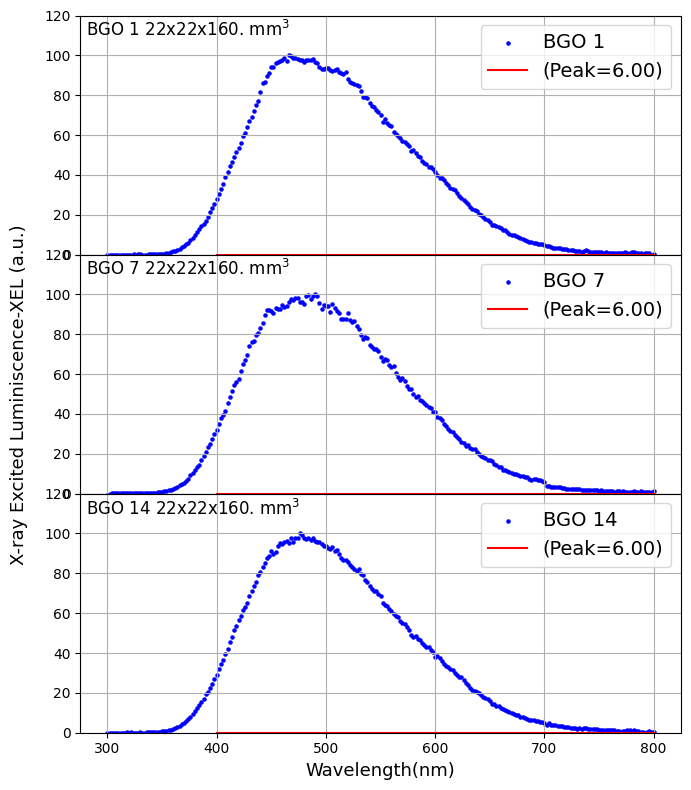

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
from scipy.optimize import curve_fit
import math

def Erlang(x, lam, k, A):
#    if x > 0 :
    x = np.array(x)
    
    # Ensure k is an integer (round and convert it)
    #k = np.round(k).astype(int)
    K= k#np.round(k).astype(int)
    result = A*(lam**K)*(x**(K-1))*np.exp(-x*lam)/sp.gamma(K)
    #result = A*(x**(K-1))*np.exp(-x*lam)
    #print(k)
    return result

def HE(x, l1,l2,l3,l4, A):
    c = l1*l2*l3*l4
    x = np.array(x)
    result = A*c*(np.exp(-l1*x)/((l2-l1)*(l3-l1)*(l4-l1)) + np.exp(-l2*x)/((l1-l2)*(l3-l2)*(l4-l2)) + np.exp(-l3*x)/((l1-l3)*(l2-l3)*(l4-l3)) + np.exp(-l1*x)/((l2-l4)*(l3-l4)*(l1-l4)))
    return result


def read_data(file_path):
    """Reads the data from a given file."""
    wavelengths = []
    fluorescence = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False

        for line in lines:
            line = line.strip()

            # Start reading data after the "Data Points" header
            if line.startswith("Data Points"):
                start_reading = True
                continue

            if start_reading:
                parts = line.split()
                if len(parts) == 2:
                    try:
                        wavelength = float(parts[0])
                        intensity = float(parts[1])
                        wavelengths.append(wavelength)
                        fluorescence.append(intensity)
                    except ValueError:
                        continue  # Ignore lines that can't be converted to float
    return wavelengths, fluorescence

def process_fluorescence(wavelengths1, fluorescence1, wavelengths2, fluorescence2, wavelengths3, fluorescence3, calib):
    """Process the fluorescence data based on given rules and normalize it."""
    adjusted_fluorescence = []
    for i in range(len(wavelengths1)):
        if wavelengths1[i] <= 700:
            adjusted_value = (fluorescence1[i] - fluorescence2[i]) / calib[i]
        else:
            adjusted_value = (fluorescence3[i] - fluorescence2[i]) / calib[i]
        adjusted_fluorescence.append(adjusted_value)
    
    # Normalize the fluorescence values
    max_value = max(adjusted_fluorescence)
    normalized_fluorescence = [val*100/ max_value for val in adjusted_fluorescence]
    
    return normalized_fluorescence

def plot_data(ax, wavelengths, normalized_fluorescence, label, ylabel):
    """Plots the fluorescence data and annotates the peak."""
    ax.scatter(wavelengths, normalized_fluorescence, label=label, color='b', s= 5)

    # Find the peak value and its position
    peak_value = max(normalized_fluorescence)
    # peak_wavelength = wavelengths[normalized_fluorescence.index(peak_value)]

    # #Annotate peak with a larger font size
    # ax.annotate(f"{peak_wavelength} nm", 
    #             xy=(peak_wavelength, peak_value), 
    #             xytext=(peak_wavelength+20, peak_value+0.1),
    #             arrowprops=dict(facecolor='black', arrowstyle="->"),
    #             fontsize=14)  # Increased font size for peak annotation
    ax.plot(wavelengths[50:], Erlang(wavelengths[50:], *data[key]['popt']), 'r', label=f"(Peak={popt[1]:.2f})")
    #ax.plot(wavelengths[50:], HE(wavelengths[50:], *data[key]['popt']), 'r', label=f"(Peak={popt[1]:.2f})")
    ax.grid(True)
    ax.legend(fontsize = 14)
    #ax.set_ylabel(ylabel)
    ax.set_ylim(0,120)
    # Add label at the top left for each plot
    ax.text(0.01, 0.98, f'{label} 22x22x160. mm$^3$', transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')

# File paths for the three sets of files (corresponding to BGO 1, 7, and 14)
file_paths = {
    1: {'file1': 'b-bgo-1_xel_012925_1.TXT', 'file2': 'b-bgo-1_xel_012925_1_bg.TXT', 'file3': 'b-bgo-1_xel_012925_1_hp.TXT'},
    7: {'file1': 'b-bgo-7_xel_020425_1.TXT', 'file2': 'b-bgo-7_xel_020425_1_bg.TXT', 'file3': 'b-bgo-7_xel_020425_1_hp.TXT'},
    14: {'file1': 'b-bgo-14_xel_020425_1.TXT', 'file2': 'b-bgo-14_xel_020425_1_bg.TXT', 'file3': 'b-bgo-14_xel_020425_1_hp.TXT'}
}

# Example calibration data
calib = [
    1.0399, 1.0546, 1.0630, 1.0623, 1.0577, 1.0573, 1.0633, 1.0732, 1.0879, 1.1023, 
    1.1138, 1.1315, 1.1398, 1.1311, 1.1217, 1.1093, 1.0838, 1.0598, 1.0468, 1.0376, 
    1.0312, 1.0289, 1.0298, 1.0312, 1.0311, 1.0319, 1.0319, 1.0337, 1.0358, 1.0381, 
    1.0395, 1.0428, 1.0439, 1.0435, 1.0421, 1.0398, 1.0352, 1.0306, 1.0263, 1.0224, 
    1.0196, 1.0176, 1.0161, 1.0160, 1.0151, 1.0138, 1.0115, 1.0074, 1.0017, 0.9955, 
    0.9875, 0.9792, 0.9709, 0.9616, 0.9523, 0.9435, 0.9346, 0.9260, 0.9177, 0.9096, 
    0.9022, 0.8958, 0.8900, 0.8851, 0.8801, 0.8747, 0.8692, 0.8635, 0.8577, 0.8522, 
    0.8466, 0.8394, 0.8314, 0.8263, 0.8292, 0.8277, 0.8279, 0.8221, 0.8179, 0.8162, 
    0.8116, 0.8089, 0.8023, 0.7987, 0.7940, 0.7900, 0.7824, 0.7787, 0.7710, 0.7668, 
    0.7657, 0.7625, 0.7592, 0.7610, 0.7625, 0.7647, 0.7665, 0.7692, 0.7646, 0.7642, 
    0.7591, 0.7568, 0.7491, 0.7449, 0.7366, 0.7313, 0.7244, 0.7216, 0.7110, 0.7057, 
    0.7010, 0.6920, 0.6869, 0.6797, 0.6740, 0.6654, 0.6609, 0.6553, 0.6482, 0.6439, 
    0.6381, 0.6336, 0.6270, 0.6221, 0.6167, 0.6117, 0.6085, 0.6031, 0.5988, 0.5944, 
    0.5874, 0.5828, 0.5770, 0.5717, 0.5657, 0.5609, 0.5552, 0.5500, 0.5462, 0.5408, 
    0.5335, 0.5271, 0.5246, 0.5189, 0.5141, 0.5074, 0.5017, 0.4993, 0.4934, 0.4889, 
    0.4858, 0.4814, 0.4736, 0.4720, 0.4667, 0.4620, 0.4579, 0.4520, 0.4463, 0.4413, 
    0.4368, 0.4326, 0.4282, 0.4220, 0.4175, 0.4103, 0.4045, 0.4012, 0.3962, 0.3904, 
    0.3851, 0.3792, 0.3753, 0.3718, 0.3639, 0.3607, 0.3562, 0.3505, 0.3461, 0.3410, 
    0.3379, 0.3326, 0.3281, 0.3244, 0.3204, 0.3160, 0.3126, 0.3085, 0.3034, 0.3011, 
    0.2969, 0.2932, 0.2892, 0.2848, 0.2812, 0.2782, 0.2748, 0.2715, 0.2695, 0.2673, 
    0.2642, 0.2630, 0.2621, 0.2629, 0.2629, 0.2643, 0.2648, 0.2671, 0.2692, 0.2719, 
    0.2715, 0.2717, 0.2696, 0.2657, 0.2615, 0.2568, 0.2504, 0.2444, 0.2380, 0.2315, 
    0.2272, 0.2215, 0.2171, 0.2117, 0.2071, 0.2024, 0.1989, 0.1942, 0.1915, 0.1870, 
    0.1835, 0.1805, 0.1783, 0.1750, 0.1713, 0.1677, 0.1651, 0.1622, 0.1591, 0.1566, 
    0.1548, 0.1523, 0.1511, 0.1495, 0.1487, 0.1498, 0.1514, 0.1531, 0.1556, 0.1591, 
    0.1633
]


# Read and process the data for each set (BGO 1, 7, 14)
data = {}
for key in file_paths:
    wavelengths1, fluorescence1 = read_data(file_paths[key]['file1'])
    wavelengths2, fluorescence2 = read_data(file_paths[key]['file2'])
    wavelengths3, fluorescence3 = read_data(file_paths[key]['file3'])
    
    normalized_fluorescence = process_fluorescence(wavelengths1, fluorescence1, wavelengths2, fluorescence2, wavelengths3, fluorescence3, calib)
    popt, _ = curve_fit(Erlang,wavelengths1[50:],normalized_fluorescence[50:], p0=[0.01, 6, 1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
    #popt, _ = curve_fit(HE,wavelengths1[50:],normalized_fluorescence[50:], p0=[0.01, 0.02, 0.03, 0.04, 1], bounds=([0, 0, 0, 0 , 0], [np.inf, np.inf, np.inf,  np.inf, np.inf]))
    data[key] = {
        'popt' : popt,
        'wavelengths': wavelengths1,
        'fluorescence': normalized_fluorescence,
        'label': f'BGO {key}'
    } 

# Create a single figure with three connected subplots sharing the x-axis
fig, axes = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'hspace': 0})

# Plot data for each set (BGO 1, 7, 14)
ylabels = ['XEL', 'XEL', 'XEL']
for ax, key, ylabel in zip(axes, [1, 7, 14], ylabels):
    plot_data(ax, data[key]['wavelengths'], data[key]['fluorescence'], data[key]['label'], ylabel)
    #plot_data(ax, data[key]['wavelengths'], Erlang(data[key]['wavelengths'], *data[key]['popt']), f"(Peak={popt[1]:.2f})", ylabel)

# Set x-axis label only for the last subplot
#axes[-1].set_xlabel('Wavelength (nm)')
plt.xlabel("Wavelength(nm)", fontsize = 13)
fig.supylabel("X-ray Excited Luminiscence-XEL (a.u.)", fontsize = 13)
plt.tight_layout()
plt.savefig("XEL_1-7-14" + ".pdf", format="pdf")
plt.show()

In [98]:
# popt, _ = curve_fit(Erlang,data[14]['wavelengths'][50:200],data[14]['fluorescence'][50:200], p0=[0.01, 6, 1], bounds=([0, 0,0], [np.inf, np.inf, np.inf]))
# print(10000*Erlang(data[14]['wavelengths'][50:200], *popt))
# plt.plot(data[14]['wavelengths'][50:200],Erlang(data[14]['wavelengths'][50:200], *popt))
# lam = 0.01
# K= 6
# Co=(lam**K)/sp.gamma(K)

# x= data[14]['wavelengths'][50:200]
# y=[X**(K-1)*np.exp(-X*lam) for X in x]
# plt.plot(x,y)
print(data[14]['fluorescence'] )

[-0.23691687052437999, -0.00762072053301521, 0.01851019051683155, 0.017913670793131324, 0.02899613607716523, 0.04473385015125641, 0.10738094131596047, 0.059564840105320045, 0.08160165383510432, 0.11271637850939188, 0.09670654923933839, 0.11315486265843194, 0.08996195319879496, 0.02417437521138407, 0.07502503504349793, 0.13548870437284935, 0.08497879362837343, 0.0886464988620481, 0.14428413922872455, 0.1599862518476523, 0.220193007884818, 0.3290526264366919, 0.3676965717258917, 0.4195133669343379, 0.4938248857111385, 0.6370343880357149, 0.7861770651671794, 0.98695290923196, 1.2088938413272394, 1.5700822646472345, 2.028031644073397, 2.358770923686189, 2.8141447292461206, 3.271222206129937, 4.172617534295824, 4.940818145478804, 5.8496900902490765, 6.832915163534677, 8.102780120978768, 9.469380493666566, 10.758911654012351, 12.29335041197952, 13.792569133890291, 15.418164240582142, 17.016014442359232, 19.29213543245575, 20.690380628712614, 22.629008407295323, 24.613894306548755, 26.8044984

In [97]:
len( data[14]['wavelengths'])

251

In [102]:
# plt.plot(data[1]['wavelengths'], data[1]['fluorescence'])
# plt.show
data[14]['wavelengths'].index(400)

50

IMPORT PACKAGES

In [4]:
import matplotlib.pyplot as plt


lam = [200.0, 202.0, 204.0, 206.0, 208.0, 210.0, 212.0, 214.0, 216.0, 218.0, 220.0, 222.0, 224.0, 226.0, 228.0, 230.0, 232.0, 234.0, 236.0, 238.0, 240.0, 242.0, 244.0, 246.0, 248.0, 250.0, 252.0, 254.0, 256.0, 258.0, 260.0, 262.0, 264.0, 266.0, 268.0, 270.0, 272.0, 274.0, 276.0, 278.0, 280.0, 282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312.0, 314.0, 316.0, 318.0, 320.0, 322.0, 324.0, 326.0, 328.0, 330.0, 332.0, 334.0, 336.0, 338.0, 340.0, 342.0, 344.0, 346.0, 348.0, 350.0, 352.0, 354.0, 356.0, 358.0, 360.0, 362.0, 364.0, 366.0, 368.0, 370.0, 372.0, 374.0, 376.0, 378.0, 380.0, 382.0, 384.0, 386.0, 388.0, 390.0, 392.0, 394.0, 396.0, 398.0, 400.0, 402.0, 404.0, 406.0, 408.0, 410.0, 412.0, 414.0, 416.0, 418.0, 420.0, 422.0, 424.0, 426.0, 428.0, 430.0, 432.0, 434.0, 436.0, 438.0, 440.0, 442.0, 444.0, 446.0, 448.0, 450.0, 452.0, 454.0, 456.0, 458.0, 460.0, 462.0, 464.0, 466.0, 468.0, 470.0, 472.0, 474.0, 476.0, 478.0, 480.0, 482.0, 484.0, 486.0, 488.0, 490.0, 492.0, 494.0, 496.0, 498.0, 500.0, 502.0, 504.0, 506.0, 508.0, 510.0, 512.0, 514.0, 516.0, 518.0, 520.0, 522.0, 524.0, 526.0, 528.0, 530.0, 532.0, 534.0, 536.0, 538.0, 540.0, 542.0, 544.0, 546.0, 548.0, 550.0, 552.0, 554.0, 556.0, 558.0, 560.0, 562.0, 564.0, 566.0, 568.0, 570.0, 572.0, 574.0, 576.0, 578.0, 580.0, 582.0, 584.0, 586.0, 588.0, 590.0, 592.0, 594.0, 596.0, 598.0, 600.0, 602.0, 604.0, 606.0, 608.0, 610.0, 612.0, 614.0, 616.0, 618.0, 620.0, 622.0, 624.0, 626.0, 628.0, 630.0, 632.0, 634.0, 636.0, 638.0, 640.0, 642.0, 644.0, 646.0, 648.0, 650.0, 652.0, 654.0, 656.0, 658.0, 660.0, 662.0, 664.0, 666.0, 668.0, 670.0, 672.0, 674.0, 676.0, 678.0, 680.0, 682.0, 684.0, 686.0, 688.0, 690.0, 692.0, 694.0, 696.0, 698.0, 700.0, 702.0, 704.0, 706.0, 708.0, 710.0, 712.0, 714.0, 716.0, 718.0, 720.0, 722.0, 724.0, 726.0, 728.0, 730.0, 732.0, 734.0, 736.0, 738.0, 740.0, 742.0, 744.0, 746.0, 748.0, 750.0, 752.0, 754.0, 756.0, 758.0, 760.0, 762.0, 764.0, 766.0, 768.0, 770.0, 772.0, 774.0, 776.0, 778.0, 780.0, 782.0, 784.0, 786.0, 788.0, 790.0, 792.0, 794.0, 796.0, 798.0, 800.0]
Tper_L_1 = [1.29, 1.26001, 1.09001, 1.20001, 1.08, 1.02, 1.02, 1.03001, 1.03001, 0.920013, 0.980011, 0.900009, 0.920013, 0.880005, 0.900009, 0.890015, 0.910004, 0.880005, 0.86, 0.800003, 0.790008, 0.770004, 0.820007, 0.76001, 0.710007, 0.730011, 0.740005, 0.710007, 0.690002, 0.690002, 0.670013, 0.630005, 0.650009, 0.630005, 0.600006, 0.630005, 0.630005, 0.650009, 0.650009, 0.650009, 0.630005, 0.630005, 0.670013, 0.670013, 0.640015, 0.670013, 0.680008, 0.640015, 0.650009, 0.640015, 0.660004, 0.640015, 0.61, 0.62001, 0.600006, 0.580002, 0.730011, 1.41, 3.46, 7.24, 11.1, 15.09, 19.04, 23.09, 27.64, 31.2, 34.5, 38.0, 41.47, 45.19, 47.59, 50.26, 52.51, 54.98, 57.41, 59.28, 60.62, 61.43, 62.8, 63.72, 65.25, 65.25, 66.35, 67.38, 67.02, 67.98, 68.2, 69.01, 69.43, 69.82, 69.72, 70.02, 70.22, 70.72, 70.12, 69.81, 70.75, 70.88, 71.27, 71.29, 71.64, 71.63, 71.7, 71.8, 71.76, 71.77, 71.96, 72.28, 72.36, 72.27, 72.56, 72.49, 72.64, 73.03, 72.94, 72.92, 73.11, 72.91, 73.34, 73.08, 73.19, 73.38, 73.34, 73.47, 73.57, 73.63, 73.59, 73.88, 73.8, 73.99, 74.01, 74.09, 74.05, 74.12, 74.27, 74.2, 74.33, 74.46, 74.42, 74.61, 74.61, 74.68, 74.7, 74.72, 74.78, 74.67, 74.72, 74.97, 74.89, 75.03, 75.06, 75.03, 75.0, 75.04, 75.13, 75.13, 75.21, 75.27, 75.26, 75.31, 75.31, 75.49, 75.47, 75.46, 75.65, 75.6, 75.62, 75.51, 75.65, 75.69, 75.73, 75.74, 75.79, 75.97, 75.88, 75.88, 76.06, 75.97, 76.06, 75.95, 76.11, 76.13, 76.21, 76.2, 76.15, 76.13, 76.25, 76.15, 76.22, 76.24, 76.34, 76.34, 76.5, 76.4, 76.53, 76.5, 76.59, 76.51, 76.55, 76.63, 76.69, 76.56, 76.7, 76.68, 76.76, 76.72, 76.68, 76.79, 76.91, 76.67, 76.8, 76.76, 76.93, 76.86, 76.85, 76.95, 77.01, 76.85, 76.96, 77.07, 77.22, 77.18, 77.2, 77.02, 77.13, 77.06, 77.23, 77.05, 77.18, 77.2, 77.15, 77.08, 77.11, 77.24, 77.17, 77.25, 77.09, 77.29, 77.33, 77.31, 77.4, 77.35, 77.43, 77.44, 77.48, 77.47, 77.6, 77.39, 77.44, 77.47, 77.55, 77.6, 77.56, 77.67, 77.76, 77.51, 77.56, 77.53, 77.74, 77.6, 77.72, 77.66, 77.69, 77.7, 77.45, 77.53, 77.77, 77.49, 77.63, 77.64, 77.82, 77.62, 77.83, 77.76, 77.76, 77.5, 78.03, 77.98, 77.83, 77.73, 77.67, 78.25, 77.97, 77.86, 77.92, 77.94, 77.97, 77.74, 77.94, 78.03, 77.97, 77.88, 77.93, 78.13, 78.11, 77.71, 78.03, 78.05, 78.11, 78.21, 78.36]
Tper_L_7 = [0.800003, 0.940002, 0.780014, 0.750015, 0.780014, 0.76001, 0.790008, 0.660004, 0.740005, 0.720001, 0.740005, 0.680008, 0.670013, 0.670013, 0.680008, 0.670013, 0.680008, 0.670013, 0.680008, 0.670013, 0.660004, 0.630005, 0.61, 0.600006, 0.570007, 0.61, 0.580002, 0.590011, 0.600006, 0.550003, 0.560013, 0.520004, 0.520004, 0.530014, 0.550003, 0.550003, 0.540008, 0.520004, 0.550003, 0.550003, 0.560013, 0.550003, 0.590011, 0.580002, 0.570007, 0.560013, 0.560013, 0.550003, 0.570007, 0.570007, 0.550003, 0.550003, 0.570007, 0.570007, 0.540008, 0.550003, 0.740005, 1.65, 4.21001, 8.62001, 12.9, 17.16, 21.32, 25.13, 29.54, 32.34, 35.52, 38.7, 41.82, 44.58, 47.02, 49.61, 52.17, 54.11, 55.39, 57.3, 58.06, 59.68, 60.6, 62.19, 62.59, 63.36, 64.11, 64.51, 65.32, 65.97, 65.97, 67.32, 67.04, 66.85, 67.04, 68.08, 68.15, 68.48, 68.24, 68.23, 68.6, 68.75, 68.81, 69.22, 69.28, 69.42, 69.66, 69.76, 69.82, 70.07, 70.11, 70.39, 70.23, 70.55, 70.5, 70.56, 70.9, 70.74, 70.76, 70.89, 71.06, 71.05, 71.24, 71.23, 71.34, 71.43, 71.57, 71.57, 71.66, 71.92, 71.87, 71.98, 72.07, 72.0, 72.18, 72.28, 72.24, 72.36, 72.37, 72.55, 72.46, 72.68, 72.5, 72.75, 72.8, 72.8, 72.94, 72.93, 73.01, 73.16, 73.18, 73.15, 73.22, 73.29, 73.25, 73.2, 73.47, 73.49, 73.57, 73.61, 73.6, 73.55, 73.7, 73.61, 73.78, 73.79, 73.84, 73.84, 74.02, 73.93, 73.99, 74.11, 74.06, 74.06, 74.33, 74.3, 74.29, 74.2, 74.37, 74.38, 74.43, 74.42, 74.5, 74.63, 74.6, 74.58, 74.52, 74.68, 74.67, 74.75, 74.81, 74.87, 74.8, 74.7, 74.93, 74.95, 75.02, 75.02, 74.92, 74.94, 75.09, 75.07, 75.12, 75.13, 75.16, 75.34, 75.28, 75.16, 75.3, 75.29, 75.34, 75.3, 75.34, 75.36, 75.42, 75.52, 75.6, 75.4, 75.55, 75.52, 75.48, 75.51, 75.6, 75.72, 75.66, 75.72, 75.66, 75.61, 75.71, 75.9, 75.84, 75.84, 75.98, 75.7, 75.87, 76.05, 75.93, 76.03, 75.95, 76.0, 76.02, 76.12, 76.16, 75.9, 76.05, 75.95, 75.99, 76.13, 76.08, 76.05, 76.05, 76.23, 76.38, 76.23, 76.1, 76.25, 76.34, 76.29, 76.2, 76.4, 76.19, 76.3, 76.38, 76.32, 76.36, 76.33, 76.4, 76.42, 76.09, 76.4, 76.57, 76.65, 76.57, 76.74, 76.84, 76.49, 76.52, 76.46, 76.68, 76.5, 76.11, 76.64, 76.52, 76.67, 76.55, 76.65, 76.7, 76.91, 76.63, 76.66, 76.56, 76.76, 77.0, 76.84, 76.97, 76.72, 76.45, 76.61, 76.87, 76.86, 76.94, 77.28, 76.93, 76.94, 76.6]
Tper_L_14 = [1.21, 1.18, 1.17001, 1.06001, 0.940002, 1.13, 1.03001, 1.09001, 1.02, 1.03001, 0.880005, 0.980011, 0.940002, 0.900009, 0.920013, 0.930008, 0.890015, 0.900009, 0.87001, 0.830002, 0.840011, 0.830002, 0.790008, 0.750015, 0.770004, 0.780014, 0.750015, 0.730011, 0.740005, 0.680008, 0.680008, 0.680008, 0.670013, 0.670013, 0.660004, 0.62001, 0.650009, 0.640015, 0.670013, 0.670013, 0.680008, 0.690002, 0.680008, 0.690002, 0.700012, 0.670013, 0.690002, 0.670013, 0.670013, 0.680008, 0.670013, 0.670013, 0.650009, 0.640015, 0.630005, 0.630005, 0.920013, 2.44, 6.67001, 14.08, 20.56, 26.74, 31.4, 35.37, 39.24, 41.9, 43.98, 46.56, 48.76, 50.52, 51.96, 54.43, 55.88, 56.8, 58.3, 59.88, 60.82, 61.54, 62.4, 63.5, 64.27, 64.89, 65.89, 65.85, 67.16, 67.08, 66.77, 67.87, 67.96, 68.5, 68.46, 69.28, 69.0, 69.22, 69.19, 70.05, 69.9, 69.91, 69.87, 70.23, 70.07, 70.47, 70.62, 70.8, 70.62, 70.97, 70.89, 71.07, 71.23, 71.38, 71.41, 71.53, 71.67, 71.55, 71.76, 71.72, 71.89, 72.05, 71.98, 72.18, 72.38, 72.31, 72.41, 72.31, 72.67, 72.8, 72.8, 72.69, 73.02, 72.95, 73.16, 73.05, 73.02, 73.21, 73.13, 73.31, 73.41, 73.44, 73.42, 73.59, 73.52, 73.67, 73.61, 73.64, 73.74, 73.85, 73.86, 73.72, 74.06, 74.04, 74.09, 74.0, 74.09, 74.22, 74.24, 74.42, 74.49, 74.37, 74.54, 74.34, 74.53, 74.71, 74.5, 74.61, 74.76, 74.71, 74.8, 74.81, 74.8, 74.76, 74.97, 74.91, 74.82, 75.03, 75.0, 75.08, 75.07, 75.23, 75.2, 75.23, 75.23, 75.24, 75.29, 75.26, 75.3, 75.34, 75.33, 75.38, 75.27, 75.38, 75.55, 75.58, 75.61, 75.57, 75.55, 75.52, 75.73, 75.71, 75.63, 75.73, 75.67, 75.63, 75.68, 75.73, 75.9, 75.99, 75.83, 75.77, 76.02, 75.89, 75.99, 75.97, 76.08, 75.97, 75.94, 76.08, 75.91, 76.07, 76.24, 76.13, 76.16, 76.12, 76.13, 76.14, 76.22, 76.16, 76.1, 76.27, 76.22, 76.3, 76.13, 76.3, 76.43, 76.22, 76.3, 76.48, 76.4, 76.43, 76.34, 76.43, 76.53, 76.39, 76.48, 76.44, 76.55, 76.48, 76.32, 76.45, 76.59, 76.62, 76.61, 76.74, 76.57, 76.77, 76.51, 76.7, 76.72, 76.63, 76.76, 76.67, 76.76, 76.81, 76.65, 76.88, 76.57, 76.8, 76.81, 77.16, 77.06, 76.98, 76.92, 76.88, 76.83, 76.76, 76.95, 76.98, 76.75, 77.05, 76.9, 76.79, 77.06, 76.8, 76.69, 77.3, 77.04, 76.8, 76.87, 77.04, 76.93, 76.95, 77.01, 77.17, 77.04, 77.23, 77.16, 77.12, 77.11, 77.11, 77.2, 77.39, 77.25]
Tper_T_1 = [0.840011, 0.920013, 0.960007, 0.87001, 0.87001, 0.840011, 0.750015, 0.750015, 0.800003, 0.770004, 0.750015, 0.780014, 0.700012, 0.710007, 0.730011, 0.710007, 0.710007, 0.710007, 0.690002, 0.670013, 0.680008, 0.650009, 0.650009, 0.640015, 0.630005, 0.62001, 0.61, 0.600006, 0.580002, 0.540008, 0.570007, 0.550003, 0.540008, 0.520004, 0.530014, 0.540008, 0.530014, 0.550003, 0.540008, 0.550003, 0.540008, 0.580002, 0.570007, 0.560013, 0.530014, 0.560013, 0.550003, 0.560013, 0.560013, 0.540008, 0.550003, 0.540008, 0.62001, 1.04, 3.8, 9.87001, 19.22, 29.38, 38.48, 45.22, 49.16, 52.06, 54.63, 56.94, 58.2, 60.06, 62.1, 62.78, 64.52, 65.55, 66.4, 66.83, 67.31, 68.6, 69.34, 69.63, 70.47, 69.79, 70.47, 70.65, 71.2, 71.98, 72.3, 72.11, 72.32, 73.01, 72.91, 73.12, 72.99, 73.54, 73.39, 73.54, 73.26, 73.93, 74.14, 73.35, 73.88, 74.01, 74.08, 74.22, 74.31, 74.28, 74.57, 74.56, 74.75, 74.57, 74.74, 74.89, 74.97, 74.73, 75.04, 74.95, 75.15, 75.17, 75.3, 75.32, 75.47, 75.31, 75.61, 75.47, 75.38, 75.66, 75.54, 75.56, 75.72, 75.81, 75.62, 75.81, 75.9, 75.93, 76.0, 76.15, 76.14, 76.03, 76.14, 76.1, 76.19, 76.23, 76.33, 76.26, 76.24, 76.25, 76.45, 76.55, 76.3, 76.54, 76.56, 76.52, 76.55, 76.52, 76.55, 76.49, 76.57, 76.71, 76.68, 76.72, 76.65, 76.69, 76.81, 76.86, 76.88, 76.72, 76.83, 76.91, 77.02, 77.01, 77.0, 77.0, 76.95, 77.01, 77.14, 77.06, 77.12, 77.04, 77.17, 77.19, 77.25, 77.27, 77.43, 77.32, 77.31, 77.29, 77.37, 77.32, 77.28, 77.27, 77.16, 77.3, 77.37, 77.49, 77.46, 77.33, 77.43, 77.54, 77.53, 77.57, 77.57, 77.48, 77.49, 77.66, 77.59, 77.55, 77.54, 77.53, 77.62, 77.7, 77.68, 77.63, 77.71, 77.68, 77.75, 77.79, 77.7, 77.77, 77.68, 77.83, 77.8, 77.78, 77.78, 77.74, 77.85, 77.92, 77.92, 77.87, 77.92, 77.73, 77.95, 77.77, 77.92, 78.06, 77.94, 78.08, 77.97, 77.89, 77.97, 78.13, 77.98, 77.89, 78.11, 77.99, 77.93, 77.97, 78.11, 78.08, 78.01, 78.03, 78.13, 78.1, 78.06, 78.18, 78.19, 78.24, 78.28, 78.29, 78.26, 78.22, 78.1, 78.17, 78.22, 78.5, 78.46, 78.29, 78.09, 77.97, 78.16, 78.31, 78.22, 78.1, 78.22, 78.27, 78.52, 78.47, 78.36, 78.28, 78.41, 78.29, 78.48, 78.46, 78.16, 78.19, 78.51, 78.52, 78.43, 78.47, 78.64, 78.47, 78.43, 78.15, 78.47, 78.28, 78.47, 78.55, 78.5, 78.56, 78.42, 78.71, 78.59, 78.47, 78.48, 78.53, 78.63]
Tper_T_7 = [1.09001, 0.990005, 0.86, 0.87001, 0.900009, 0.920013, 0.840011, 0.800003, 0.76001, 0.740005, 0.720001, 0.770004, 0.76001, 0.730011, 0.720001, 0.720001, 0.680008, 0.710007, 0.690002, 0.730011, 0.690002, 0.680008, 0.650009, 0.670013, 0.630005, 0.640015, 0.650009, 0.630005, 0.62001, 0.590011, 0.580002, 0.580002, 0.570007, 0.570007, 0.580002, 0.560013, 0.590011, 0.570007, 0.580002, 0.600006, 0.590011, 0.590011, 0.600006, 0.600006, 0.590011, 0.590011, 0.61, 0.600006, 0.590011, 0.61, 0.590011, 0.590011, 0.62001, 1.07, 3.95001, 10.26, 19.94, 29.92, 39.19, 45.84, 49.46, 52.77, 54.66, 56.64, 58.88, 60.36, 61.21, 62.91, 64.12, 64.67, 65.27, 66.51, 66.65, 67.95, 67.85, 69.45, 68.72, 69.88, 70.03, 70.32, 70.73, 71.06, 71.34, 71.34, 71.92, 72.25, 71.66, 72.19, 72.5, 72.42, 73.01, 73.17, 72.9, 73.35, 73.42, 72.02, 73.1, 73.29, 73.39, 73.48, 73.4, 73.66, 73.75, 73.77, 73.81, 73.92, 73.89, 74.12, 74.09, 74.29, 74.09, 74.25, 74.25, 74.25, 74.34, 74.15, 74.51, 74.46, 74.68, 74.59, 74.7, 74.76, 74.68, 74.97, 74.99, 75.15, 74.91, 74.9, 75.13, 75.01, 75.16, 75.28, 75.04, 75.28, 75.15, 75.29, 75.36, 75.41, 75.4, 75.39, 75.48, 75.41, 75.53, 75.76, 75.6, 75.63, 75.61, 75.77, 75.68, 75.56, 75.78, 75.7, 75.73, 75.88, 75.77, 75.95, 75.95, 75.9, 76.03, 75.99, 76.06, 75.99, 76.08, 76.02, 75.95, 76.12, 76.13, 76.29, 76.18, 76.19, 76.35, 76.29, 76.32, 76.25, 76.25, 76.28, 76.44, 76.27, 76.38, 76.48, 76.48, 76.48, 76.37, 76.44, 76.49, 76.5, 76.43, 76.46, 76.58, 76.45, 76.65, 76.77, 76.59, 76.69, 76.57, 76.57, 76.66, 76.7, 76.76, 76.74, 76.75, 76.65, 76.63, 76.79, 76.76, 76.79, 76.84, 76.76, 76.91, 76.86, 76.96, 76.93, 76.86, 76.85, 76.87, 76.94, 76.74, 76.82, 76.95, 76.95, 77.1, 76.89, 77.0, 77.03, 77.0, 77.2, 77.12, 76.94, 77.11, 77.08, 77.12, 77.27, 76.96, 77.04, 77.22, 77.3, 77.45, 77.38, 77.13, 77.3, 77.26, 77.15, 77.33, 77.18, 77.16, 77.31, 76.89, 77.26, 77.29, 77.39, 77.18, 77.31, 77.38, 77.24, 77.56, 77.34, 77.17, 77.47, 77.28, 77.3, 77.26, 77.18, 77.11, 77.53, 77.41, 77.51, 77.23, 77.48, 77.5, 77.7, 77.49, 77.25, 77.38, 77.35, 77.46, 77.28, 77.04, 77.48, 77.39, 77.43, 77.51, 77.32, 77.37, 77.99, 77.56, 77.49, 77.62, 77.38, 77.68, 77.56, 77.98, 77.33, 77.47, 77.28, 77.59, 77.52, 77.39, 77.62, 77.58, 77.94, 77.42]
Tper_T_14 = [0.86, 1.06001, 0.500015, 0.790008, 0.920013, 0.830002, 0.970001, 0.900009, 0.880005, 0.800003, 0.800003, 0.730011, 0.770004, 0.770004, 0.720001, 0.780014, 0.76001, 0.76001, 0.740005, 0.690002, 0.670013, 0.690002, 0.660004, 0.680008, 0.670013, 0.650009, 0.660004, 0.630005, 0.640015, 0.61, 0.630005, 0.580002, 0.630005, 0.600006, 0.590011, 0.580002, 0.590011, 0.570007, 0.570007, 0.62001, 0.62001, 0.62001, 0.600006, 0.61, 0.62001, 0.600006, 0.62001, 0.62001, 0.61, 0.590011, 0.61, 0.630005, 0.700012, 1.18, 4.28001, 11.57, 22.65, 34.27, 44.52, 52.11, 55.99, 58.45, 60.87, 62.35, 63.98, 64.88, 66.26, 67.38, 68.04, 68.3, 68.82, 70.2, 70.9, 71.11, 70.55, 72.0, 72.36, 72.81, 72.71, 72.87, 73.4, 73.81, 73.94, 73.73, 74.03, 74.28, 73.91, 74.83, 75.08, 75.05, 74.71, 75.31, 75.66, 75.29, 75.14, 74.47, 75.74, 75.57, 75.35, 75.7, 75.54, 75.78, 75.68, 75.83, 75.7, 75.82, 75.92, 76.05, 76.15, 75.97, 76.09, 76.24, 76.22, 76.09, 76.43, 76.23, 76.25, 76.34, 76.39, 76.5, 76.47, 76.38, 76.64, 76.57, 76.5, 76.75, 76.58, 76.62, 76.8, 76.57, 76.66, 76.71, 76.68, 76.92, 76.76, 76.99, 76.79, 76.79, 76.92, 76.95, 76.89, 77.03, 76.95, 77.06, 76.91, 77.13, 77.1, 77.08, 77.16, 76.96, 77.11, 77.07, 77.26, 77.2, 77.18, 77.26, 77.15, 77.32, 77.29, 77.3, 77.33, 77.33, 77.34, 77.38, 77.33, 77.33, 77.37, 77.38, 77.46, 77.46, 77.53, 77.47, 77.33, 77.49, 77.6, 77.52, 77.49, 77.48, 77.59, 77.58, 77.69, 77.55, 77.59, 77.63, 77.51, 77.65, 77.59, 77.65, 77.58, 77.49, 77.7, 77.77, 77.75, 77.64, 77.73, 77.64, 77.75, 77.7, 77.63, 77.64, 77.71, 77.71, 77.65, 77.69, 77.58, 77.94, 77.84, 77.74, 77.71, 77.83, 77.78, 77.66, 77.86, 77.74, 77.8, 77.79, 77.71, 77.75, 77.89, 77.64, 77.74, 77.86, 77.86, 77.75, 77.71, 77.76, 77.83, 78.0, 77.98, 77.91, 77.74, 77.9, 77.91, 77.74, 77.85, 77.87, 78.19, 77.99, 77.94, 77.82, 78.0, 77.81, 77.95, 78.13, 77.94, 77.96, 77.83, 78.0, 77.91, 77.84, 78.04, 78.12, 78.01, 77.94, 78.01, 78.02, 77.9, 77.88, 77.94, 77.96, 78.09, 77.91, 78.03, 78.31, 77.89, 77.95, 78.04, 78.26, 78.29, 78.17, 78.11, 78.37, 78.04, 77.99, 77.98, 78.08, 77.91, 78.01, 77.94, 77.99, 77.93, 77.99, 77.87, 78.2, 77.84, 77.88, 78.02, 77.98, 78.02, 77.95, 78.11, 78.25, 78.15, 78.23, 78.19, 78.28, 78.12, 78.28, 78.42, 78.22, 78.17]


DEFINE FUNCTIONS

In [5]:
# Transm_dir = os.path.abspath("../../Transmission/Transmission")
# sys.path.append(Transm_dir)
# import Transmission_plots.ipynb

def read_data(file_path):
    """Reads the data from a given file."""
    wavelengths = []
    fluorescence = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False

        for line in lines:
            line = line.strip()

            # Start reading data after the "Data Points" header
            if line.startswith("Data Points"):
                start_reading = True
                continue

            if start_reading:
                parts = line.split()
                if len(parts) == 2:
                    try:
                        wavelength = float(parts[0])
                        intensity = float(parts[1])
                        wavelengths.append(wavelength)
                        fluorescence.append(intensity)
                    except ValueError:
                        continue  # Ignore lines that can't be converted to float
    return wavelengths, fluorescence

def process_fluorescence(wavelengths1, fluorescence1, wavelengths2, fluorescence2, wavelengths3, fluorescence3, calib):
    """Process the fluorescence data based on given rules and normalize it."""
    adjusted_fluorescence = []
    for i in range(len(wavelengths1)):
        if wavelengths1[i] <= 700:
            adjusted_value = (fluorescence1[i] - fluorescence2[i])/ calib[i]
        else:
            adjusted_value = (fluorescence3[i] - fluorescence2[i])/ calib[i]
        adjusted_fluorescence.append(adjusted_value)
    
    # Normalize the fluorescence values
    max_value = max(adjusted_fluorescence)
    normalized_fluorescence = [val*100*0.6/ max_value for val in adjusted_fluorescence]
    
    return normalized_fluorescence

def plot_data(ax, wavelengths, normalized_fluorescence, label, ylabel, style, col, key):
    """Plots the fluorescence data and annotates the peak."""
    ax.plot(wavelengths, normalized_fluorescence, label=label, linestyle= style,color= col)
    #ax.plot(lam, Tper)
    # Find the peak value and its position
    peak_value = max(normalized_fluorescence)
    peak_wavelength = wavelengths[normalized_fluorescence.index(peak_value)]

    # Annotate peak with a larger font size
    # ax.annotate(f"Peak: {peak_value:.2f} at {peak_wavelength} nm", 
    #             xy=(peak_wavelength, peak_value), 
    #             xytext=(peak_wavelength+20, peak_value+0.1),
    #             arrowprops=dict(facecolor='black', arrowstyle="->"),
    #             fontsize=14)  # Increased font size for peak annotation
    
    ax.grid(True)
    ax.legend(fontsize = 12)
   # ax.set_ylabel(ylabel)
    ax.set_ylim(0,100)
    # Add label at the top left for each plot
    ax.text(0.01, 0.98, f'BGO {key} 22x22x160. mm$^3$', transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='left', color='black')


EXECUTE

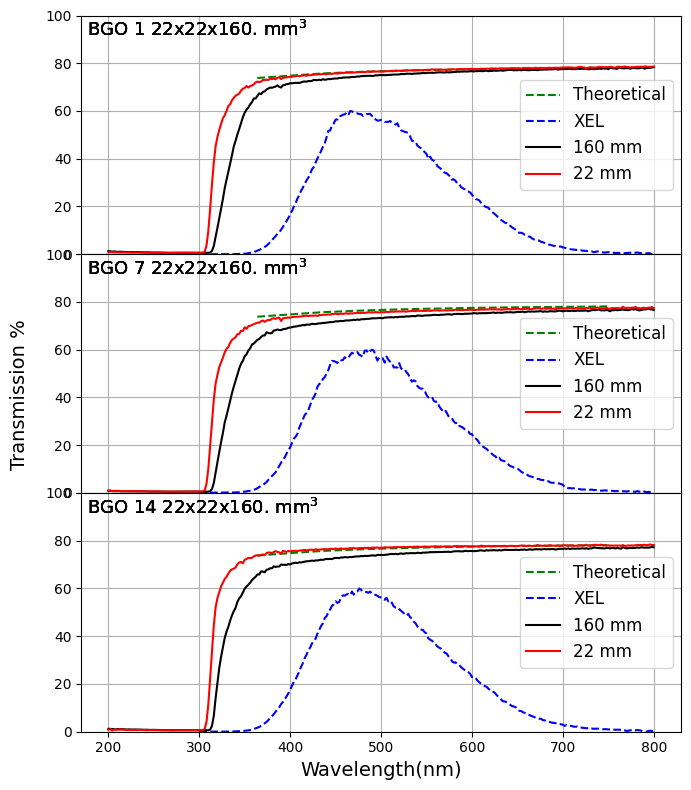

In [7]:
# File paths for the three sets of files (corresponding to BGO 1, 7, and 14)
file_paths = {
    1: {'file1': 'b-bgo-1_xel_012925_1.TXT', 'file2': 'b-bgo-1_xel_012925_1_bg.TXT', 'file3': 'b-bgo-1_xel_012925_1_hp.TXT', 'TL': Tper_L_1, 'TT': Tper_T_1},
    7: {'file1': 'b-bgo-7_xel_020425_1.TXT', 'file2': 'b-bgo-7_xel_020425_1_bg.TXT', 'file3': 'b-bgo-7_xel_020425_1_hp.TXT', 'TL': Tper_L_7, 'TT': Tper_T_7},
    14: {'file1': 'b-bgo-14_xel_020425_1.TXT', 'file2': 'b-bgo-14_xel_020425_1_bg.TXT', 'file3': 'b-bgo-14_xel_020425_1_hp.TXT', 'TL': Tper_L_14, 'TT': Tper_T_14}
}

# Example calibration data
calib = [
    1.0399, 1.0546, 1.0630, 1.0623, 1.0577, 1.0573, 1.0633, 1.0732, 1.0879, 1.1023, 
    1.1138, 1.1315, 1.1398, 1.1311, 1.1217, 1.1093, 1.0838, 1.0598, 1.0468, 1.0376, 
    1.0312, 1.0289, 1.0298, 1.0312, 1.0311, 1.0319, 1.0319, 1.0337, 1.0358, 1.0381, 
    1.0395, 1.0428, 1.0439, 1.0435, 1.0421, 1.0398, 1.0352, 1.0306, 1.0263, 1.0224, 
    1.0196, 1.0176, 1.0161, 1.0160, 1.0151, 1.0138, 1.0115, 1.0074, 1.0017, 0.9955, 
    0.9875, 0.9792, 0.9709, 0.9616, 0.9523, 0.9435, 0.9346, 0.9260, 0.9177, 0.9096, 
    0.9022, 0.8958, 0.8900, 0.8851, 0.8801, 0.8747, 0.8692, 0.8635, 0.8577, 0.8522, 
    0.8466, 0.8394, 0.8314, 0.8263, 0.8292, 0.8277, 0.8279, 0.8221, 0.8179, 0.8162, 
    0.8116, 0.8089, 0.8023, 0.7987, 0.7940, 0.7900, 0.7824, 0.7787, 0.7710, 0.7668, 
    0.7657, 0.7625, 0.7592, 0.7610, 0.7625, 0.7647, 0.7665, 0.7692, 0.7646, 0.7642, 
    0.7591, 0.7568, 0.7491, 0.7449, 0.7366, 0.7313, 0.7244, 0.7216, 0.7110, 0.7057, 
    0.7010, 0.6920, 0.6869, 0.6797, 0.6740, 0.6654, 0.6609, 0.6553, 0.6482, 0.6439, 
    0.6381, 0.6336, 0.6270, 0.6221, 0.6167, 0.6117, 0.6085, 0.6031, 0.5988, 0.5944, 
    0.5874, 0.5828, 0.5770, 0.5717, 0.5657, 0.5609, 0.5552, 0.5500, 0.5462, 0.5408, 
    0.5335, 0.5271, 0.5246, 0.5189, 0.5141, 0.5074, 0.5017, 0.4993, 0.4934, 0.4889, 
    0.4858, 0.4814, 0.4736, 0.4720, 0.4667, 0.4620, 0.4579, 0.4520, 0.4463, 0.4413, 
    0.4368, 0.4326, 0.4282, 0.4220, 0.4175, 0.4103, 0.4045, 0.4012, 0.3962, 0.3904, 
    0.3851, 0.3792, 0.3753, 0.3718, 0.3639, 0.3607, 0.3562, 0.3505, 0.3461, 0.3410, 
    0.3379, 0.3326, 0.3281, 0.3244, 0.3204, 0.3160, 0.3126, 0.3085, 0.3034, 0.3011, 
    0.2969, 0.2932, 0.2892, 0.2848, 0.2812, 0.2782, 0.2748, 0.2715, 0.2695, 0.2673, 
    0.2642, 0.2630, 0.2621, 0.2629, 0.2629, 0.2643, 0.2648, 0.2671, 0.2692, 0.2719, 
    0.2715, 0.2717, 0.2696, 0.2657, 0.2615, 0.2568, 0.2504, 0.2444, 0.2380, 0.2315, 
    0.2272, 0.2215, 0.2171, 0.2117, 0.2071, 0.2024, 0.1989, 0.1942, 0.1915, 0.1870, 
    0.1835, 0.1805, 0.1783, 0.1750, 0.1713, 0.1677, 0.1651, 0.1622, 0.1591, 0.1566, 
    0.1548, 0.1523, 0.1511, 0.1495, 0.1487, 0.1498, 0.1514, 0.1531, 0.1556, 0.1591, 
    0.1633
]
lam_th = [363.9,407.7,435.8,480,508,550,600,643,750]
tran_th = [73.83,75.01,75.73,76.43,76.78,77.17,77.52,77.75,78.15]

# Read and process the data for each set (BGO 1, 7, 14)
data = {}
for key in file_paths:
    wavelengths1, fluorescence1 = read_data(file_paths[key]['file1'])
    wavelengths2, fluorescence2 = read_data(file_paths[key]['file2'])
    wavelengths3, fluorescence3 = read_data(file_paths[key]['file3'])
    Trans_L = file_paths[key]['TL']
    Trans_T = file_paths[key]['TT']
    normalized_fluorescence = process_fluorescence(wavelengths1, fluorescence1, wavelengths2, fluorescence2, wavelengths3, fluorescence3, calib)
    data[key] = {
        'Trans_L' : Trans_L,
        'Trans_T' : Trans_T,
        'lam' : lam,
        'wavelengths': wavelengths1,
        'fluorescence': normalized_fluorescence,
        'label': f'XEL'
    }

# Create a single figure with three connected subplots sharing the x-axis
fig, axes = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'hspace': 0})

# Plot data for each set (BGO 1, 7, 14)
ylabels = ['Transmission %', 'Transmission %', 'Transmission %']
for ax, key, ylabel in zip(axes, [1, 7, 14], ylabels):
    plot_data(ax, lam_th, tran_th, 'Theoretical', ylabel,'--', 'green', key)
    plot_data(ax, data[key]['wavelengths'], data[key]['fluorescence'], data[key]['label'], ylabel,'--', 'blue', key)
    plot_data(ax, data[key]['lam'], data[key]['Trans_L'], '160 mm', ylabel, '-','black',key)
    plot_data(ax, data[key]['lam'], data[key]['Trans_T'], '22 mm', ylabel, '-', 'red', key)
# Set x-axis label only for the last subplot
plt.xlabel("Wavelength(nm)", fontsize = 14)
fig.supylabel("Transmission %", fontsize = 14)
plt.tight_layout()
plt.savefig("Trans_XEL_1-7-14" + ".png", format="png")
plt.show()

EWLT

In [78]:
R = sum(data[6]['fluorescence'][i-50] * data[1]['Trans_T'][i] for i in range(50, 301)) / sum(data[1]['fluorescence'][i-50] for i in range(50, 301))

print(R)

75.39728952520227


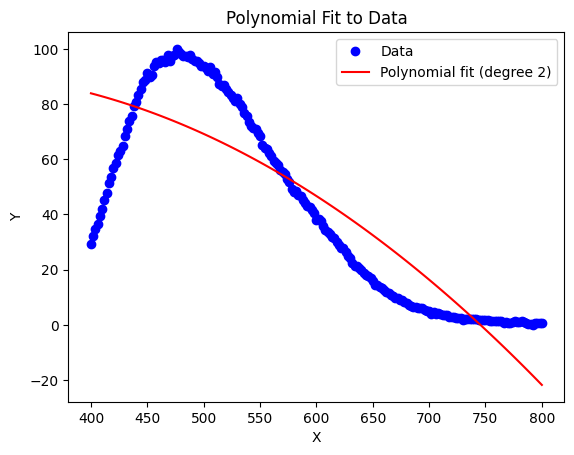

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = data[14]['wavelengths'][50:]
y = data[14]['fluorescence'][50:]
# x = [300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312.0, 314.0, 316.0, 318.0, 320.0, 322.0, 324.0, 326.0, 328.0, 330.0, 332.0, 334.0, 336.0, 338.0, 340.0, 342.0, 344.0, 346.0, 348.0, 350.0, 352.0, 354.0, 356.0, 358.0, 360.0, 362.0, 364.0, 366.0, 368.0, 370.0, 372.0, 374.0, 376.0, 378.0, 380.0, 382.0, 384.0, 386.0, 388.0, 390.0, 392.0, 394.0, 396.0, 398.0, 400.0, 402.0, 404.0, 406.0, 408.0, 410.0, 412.0, 414.0, 416.0, 418.0, 420.0, 422.0, 424.0, 426.0, 428.0, 430.0, 432.0, 434.0, 436.0, 438.0, 440.0, 442.0, 444.0, 446.0, 448.0, 450.0, 452.0, 454.0, 456.0, 458.0, 460.0, 462.0, 464.0, 466.0, 468.0, 470.0, 472.0, 474.0, 476.0, 478.0, 480.0, 482.0, 484.0, 486.0, 488.0, 490.0, 492.0, 494.0, 496.0, 498.0, 500.0, 502.0, 504.0, 506.0, 508.0, 510.0, 512.0, 514.0, 516.0, 518.0, 520.0, 522.0, 524.0, 526.0, 528.0, 530.0, 532.0, 534.0, 536.0, 538.0, 540.0, 542.0, 544.0, 546.0, 548.0, 550.0, 552.0, 554.0, 556.0, 558.0, 560.0, 562.0, 564.0, 566.0, 568.0, 570.0, 572.0, 574.0, 576.0, 578.0, 580.0, 582.0, 584.0, 586.0, 588.0, 590.0, 592.0, 594.0, 596.0, 598.0, 600.0, 602.0, 604.0, 606.0, 608.0, 610.0, 612.0, 614.0, 616.0, 618.0, 620.0, 622.0, 624.0, 626.0, 628.0, 630.0, 632.0, 634.0, 636.0, 638.0, 640.0, 642.0, 644.0, 646.0, 648.0, 650.0, 652.0, 654.0, 656.0, 658.0, 660.0, 662.0, 664.0, 666.0, 668.0, 670.0, 672.0, 674.0, 676.0, 678.0, 680.0, 682.0, 684.0, 686.0, 688.0, 690.0, 692.0, 694.0, 696.0, 698.0, 700.0, 702.0, 704.0, 706.0, 708.0, 710.0, 712.0, 714.0, 716.0, 718.0, 720.0, 722.0, 724.0, 726.0, 728.0, 730.0, 732.0, 734.0, 736.0, 738.0, 740.0, 742.0, 744.0, 746.0, 748.0, 750.0, 752.0, 754.0, 756.0, 758.0, 760.0, 762.0, 764.0, 766.0, 768.0, 770.0, 772.0, 774.0, 776.0, 778.0, 780.0, 782.0, 784.0, 786.0, 788.0, 790.0, 792.0, 794.0, 796.0, 798.0, 800.0]
# #y = [-0.23691687052437999, -0.00762072053301521, 0.01851019051683155, 0.017913670793131324, 0.02899613607716523, 0.04473385015125641, 0.10738094131596047, 0.059564840105320045, 0.08160165383510432, 0.11271637850939188, 0.09670654923933839, 0.11315486265843194, 0.08996195319879496, 0.02417437521138407, 0.07502503504349793, 0.13548870437284935, 0.08497879362837343, 0.0886464988620481, 0.14428413922872455, 0.1599862518476523, 0.220193007884818, 0.3290526264366919, 0.3676965717258917, 0.4195133669343379, 0.4938248857111385, 0.6370343880357149, 0.7861770651671794, 0.98695290923196, 1.2088938413272394, 1.5700822646472345, 2.028031644073397, 2.358770923686189, 2.8141447292461206, 3.271222206129937, 4.172617534295824, 4.940818145478804, 5.8496900902490765, 6.832915163534677, 8.102780120978768, 9.469380493666566, 10.758911654012351, 12.29335041197952, 13.792569133890291, 15.418164240582142, 17.016014442359232, 19.29213543245575, 20.690380628712614, 22.629008407295323, 24.613894306548755, 26.80449845377692, 29.219429797811294, 32.12087019809038, 34.6867675101299, 36.542866525514434, 39.30854750554811, 42.046239726683154, 45.2894140114823, 47.92987325264143, 51.42499028844717, 53.7252940074577, 56.82433531605613, 58.758692824663086, 61.60247958848572, 63.058388349855605, 64.97742042824167, 68.43555121101784, 71.05792210380999, 73.79441753796539, 75.61000093380046, 79.39665194913205, 80.61570171869214, 83.25168561195439, 85.31897387663696, 87.92106575487635, 88.82298957031776, 91.1435553522881, 89.88054369522104, 90.59286780229463, 93.70593773990862, 95.2284803589335, 94.93789351214804, 95.86016273444514, 96.11863548124175, 95.27557207795041, 97.85869624914803, 95.70249143939003, 97.59532337720559, 97.93152122287003, 100.0, 99.05292690125773, 97.98275305041382, 97.28712968756919, 97.53187070881346, 96.96917837373238, 97.87676847997668, 96.31915280748883, 95.76165867200808, 95.55030060952122, 94.86127894826319, 93.95246725663644, 93.76201419361301, 92.95279627364371, 92.07575997988924, 93.44675853188137, 91.05921226277482, 91.60710682688791, 89.89569170764425, 87.46052277706758, 86.69692782018595, 86.83674442418693, 85.56548638207275, 84.38385481846942, 83.35904576263573, 82.2310193846088, 81.01188055728306, 82.22940582104933, 79.91077568143402, 79.04314878261209, 76.75398040003182, 75.69488808696633, 73.5050511119506, 72.10739142535438, 71.2887858158727, 71.07353133817288, 69.45766904554014, 68.52596337764822, 65.19944187724701, 64.22072806462857, 63.594909337210964, 62.24221169901035, 61.09079762772928, 59.518273090742305, 58.651484014098074, 57.99061507426249, 56.22219866725054, 55.270981868596515, 54.641282691627225, 52.819741587972, 51.710738505187585, 49.23080217981683, 48.28112850336975, 48.40432865032993, 46.89117562935409, 46.54437264952297, 45.78853256030035, 44.90572760032242, 44.003022263306105, 42.43779801717472]
# y = [-0.23691687052437999, -0.00762072053301521, 0.01851019051683155, 0.017913670793131324, 0.02899613607716523, 0.04473385015125641, 0.10738094131596047, 0.059564840105320045, 0.08160165383510432, 0.11271637850939188, 0.09670654923933839, 0.11315486265843194, 0.08996195319879496, 0.02417437521138407, 0.07502503504349793, 0.13548870437284935, 0.08497879362837343, 0.0886464988620481, 0.14428413922872455, 0.1599862518476523, 0.220193007884818, 0.3290526264366919, 0.3676965717258917, 0.4195133669343379, 0.4938248857111385, 0.6370343880357149, 0.7861770651671794, 0.98695290923196, 1.2088938413272394, 1.5700822646472345, 2.028031644073397, 2.358770923686189, 2.8141447292461206, 3.271222206129937, 4.172617534295824, 4.940818145478804, 5.8496900902490765, 6.832915163534677, 8.102780120978768, 9.469380493666566, 10.758911654012351, 12.29335041197952, 13.792569133890291, 15.418164240582142, 17.016014442359232, 19.29213543245575, 20.690380628712614, 22.629008407295323, 24.613894306548755, 26.80449845377692, 29.219429797811294, 32.12087019809038, 34.6867675101299, 36.542866525514434, 39.30854750554811, 42.046239726683154, 45.2894140114823, 47.92987325264143, 51.42499028844717, 53.7252940074577, 56.82433531605613, 58.758692824663086, 61.60247958848572, 63.058388349855605, 64.97742042824167, 68.43555121101784, 71.05792210380999, 73.79441753796539, 75.61000093380046, 79.39665194913205, 80.61570171869214, 83.25168561195439, 85.31897387663696, 87.92106575487635, 88.82298957031776, 91.1435553522881, 89.88054369522104, 90.59286780229463, 93.70593773990862, 95.2284803589335, 94.93789351214804, 95.86016273444514, 96.11863548124175, 95.27557207795041, 97.85869624914803, 95.70249143939003, 97.59532337720559, 97.93152122287003, 100.0, 99.05292690125773, 97.98275305041382, 97.28712968756919, 97.53187070881346, 96.96917837373238, 97.87676847997668, 96.31915280748883, 95.76165867200808, 95.55030060952122, 94.86127894826319, 93.95246725663644, 93.76201419361301, 92.95279627364371, 92.07575997988924, 93.44675853188137, 91.05921226277482, 91.60710682688791, 89.89569170764425, 87.46052277706758, 86.69692782018595, 86.83674442418693, 85.56548638207275, 84.38385481846942, 83.35904576263573, 82.2310193846088, 81.01188055728306, 82.22940582104933, 79.91077568143402, 79.04314878261209, 76.75398040003182, 75.69488808696633, 73.5050511119506, 72.10739142535438, 71.2887858158727, 71.07353133817288, 69.45766904554014, 68.52596337764822, 65.19944187724701, 64.22072806462857, 63.594909337210964, 62.24221169901035, 61.09079762772928, 59.518273090742305, 58.651484014098074, 57.99061507426249, 56.22219866725054, 55.270981868596515, 54.641282691627225, 52.819741587972, 51.710738505187585, 49.23080217981683, 48.28112850336975, 48.40432865032993, 46.89117562935409, 46.54462389466923, 45.1652558453652, 43.998394465770154, 43.13830523612429, 42.80135022553816, 41.72380332067867, 40.439990740883246, 38.16176425171339, 38.424211377008945, 37.64290758878579, 35.77207198313951, 34.53068480023555, 33.660673109130016, 33.07844304056088, 31.88380912535615, 31.346755939017875, 30.128807859792108, 29.042334812566725, 27.773362506616447, 27.7985749180298, 26.502609729243613, 25.0117489452036, 24.17678596480844, 22.559435868348462, 21.234310420889567, 21.162574044059603, 20.599110187645174, 19.762616757584222, 18.87056602505329, 17.912502504209023, 17.618493653291903, 17.141685337694863, 15.987623619898784, 14.60165795234687, 14.528909156791494, 13.640109131136752, 13.16658804455289, 12.590794762188986, 11.749062278354929, 11.449867347870224, 10.828401445824154, 10.454417558350686, 9.739357791288768, 9.557459116814849, 9.077215117718623, 9.030977541813849, 8.082310150588112, 7.9688902459478514, 7.297542638045426, 6.974283018532672, 6.614956305726128, 6.389528905331521, 6.175853972859936, 5.939299310341248, 6.040750958408523, 5.377755378970642, 5.157983290599015, 4.942631959962852, 4.0888303407458615, 4.652692600009206, 4.056302001758311, 4.094953528109093, 3.949184241420963, 3.525541757814839, 3.492762326594986, 3.5852765307502628, 2.8678025233004405, 2.8842765503226917, 2.729154828201495, 2.4961703376201716, 2.413557249777262, 2.4802292770788132, 1.9058182631985376, 2.197646447712171, 2.076217978089877, 2.1382592782051253, 2.136046968156348, 2.0845846729096995, 1.9313705295160912, 1.667128815196863, 1.8143796943507176, 1.7507499073640156, 1.5997129627676567, 1.5614478205292477, 1.4784149120327619, 1.5320617335733222, 1.315015871221449, 1.4427951286430387, 1.4237851837995283, 1.3361787136074408, 0.7120958435589497, 0.8844046858407509, 0.6020764623753989, 0.7201053267604933, 0.8856132250700339, 1.358077618613442, 1.1190258602487915, 0.9046754285219845, 1.2331105833225124, 1.0111965768115008, 0.8051332696709776, 0.22612832457380838, 0.3089516097273795, 0.09274323971407926, 0.4935630767230801, 0.7082643800654944, 0.49294908003540533, 0.5509818869009722]
# Fit a polynomial curve of degree 2
coefficients = np.polyfit(x, y, 2)

# Create a polynomial function using the coefficients
poly_func = np.poly1d(coefficients)

# Generate x values for plotting the curve
x_vals = np.linspace(min(x), max(x), 100)

# Plot the data and the fitted curve
plt.plot(x, y, 'bo', label='Data')
plt.plot(x_vals, poly_func(x_vals), 'r-', label='Polynomial fit (degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Fit to Data')
plt.legend()
plt.show()


In [101]:
x.at(400)

AttributeError: 'list' object has no attribute 'at'